In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Learning Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import seaborn as sns
from collections import Counter, defaultdict

Load Dataset and look at it

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("newnew8.csv")

In [5]:
# List of columns to normalize
columns_to_normalize = [
    'prostate_vol', 'lesion_count', 'adc_kurt', 'adc_10p', 't2w_min', 'hbv_skew', 'psa', 'pirads_max'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

In [6]:
print(data.head())

  study_id  prostate_vol  lesion_count  adc_kurt   adc_10p   t2w_min  \
0     M003      0.273042      0.230769  0.044776  0.654154  0.605155   
1     M004      0.084078      0.153846  0.043284  0.680210  0.333229   
2     M005      0.631075      0.307692  0.033091  0.759404  0.416618   
3     M006      0.135777      0.307692  1.000000  0.844676  0.456647   
4     M007      0.828207      0.538462  0.037786  0.800340  0.455343   

   hbv_skew       psa  pirads_max  outcome  
0  0.321852  0.239695         0.8        0  
1  0.554457  0.056489         0.0        0  
2  0.505950  0.717557         0.0        0  
3  0.282822  0.055980         0.4        0  
4  0.496500  0.395929         0.4        0  


In [7]:
#remove user id from data frame
df = data.drop('study_id', axis = 1)
df.head()
#split train test 
from sklearn.model_selection import train_test_split
X = df
y = df.outcome.values.astype('int32')
X.drop(['outcome'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66, test_size=0.34, random_state=0)

In [8]:
l_model = LogisticRegression(solver='lbfgs')
logit = l_model.fit(X_train, y_train)
predictions = logit.predict(X_test)
#find roc auc curve
logisticRegressionAUC_1 = metrics.roc_auc_score(y_test, logit.predict_proba(X_test)[:,1])
fpr_logit, tpr_logit, threshold_logit = metrics.roc_curve(y_test, logit.predict_proba(X_test)[:,1])
print(logisticRegressionAUC_1)

0.8329081632653061


In [17]:
import joblib
def main(num, X, y):
    logistic_regression_results = []
    l_tpr = []
    l_fpr = []
    random_forest_results = []
    rf_tpr = []
    rf_fpr = []
    best_rf_auc = -1
    best_log_auc = -1
    best_rf_model = None
    best_log_model = None
    for i in range(num):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
        
        #Random Forest Classifier
        rf_model = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state = 42)
        rf = rf_model.fit(X_train, y_train)
        predictions = rf.predict(X_test)
        #find ROC AUC curve
        randomForestAUC = metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
        fpr_RF, tpr_RF, threshold = metrics.roc_curve(y_test, rf.predict_proba(X_test)[:,1])

        if randomForestAUC > best_rf_auc:
            best_rf_auc = randomForestAUC
            best_rf_model = rf_model

        random_forest_results.append(randomForestAUC)
        rf_tpr.append(tpr_RF)
        rf_fpr.append(fpr_RF)
        #Logistic regression
        l_model = LogisticRegression(solver='lbfgs')
        log = l_model.fit(X_train, y_train)
        predictions = log.predict(X_test)
        #find roc auc curve
        logisticRegressionAUC = metrics.roc_auc_score(y_test, log.predict_proba(X_test)[:,1])
        fpr_log, tpr_log, threshold = metrics.roc_curve(y_test, log.predict_proba(X_test)[:,1])

        if logisticRegressionAUC > best_log_auc:
            best_log_auc = logisticRegressionAUC
            best_log_model = l_model
        logistic_regression_results.append(logisticRegressionAUC)
        l_tpr.append(tpr_log)
        l_fpr.append(fpr_log)

    # Save the best models
    joblib.dump(best_rf_model, 'best_rf_model.joblib')
    joblib.dump(best_log_model, 'best_log_model.joblib')
    
    #return random_forest_results, rf_tpr, rf_fpr
    return logistic_regression_results, l_tpr, l_fpr, random_forest_results, rf_tpr, rf_fpr


In [18]:
logistic_regression_results, l_tpr, l_fpr, rf_result, rf_tpr_1, rf_fpr_1 = main(1000, X, y)
#log_result, l_tpr_1, l_fpr_1, rf_result, rf_tpr_1, rf_fpr_1 = main(1, X, y)

In [33]:
print(max(rf_result))

0.846153846153846


In [21]:
testing_data = pd.read_csv("MAST_testset.csv")
real_outcome = testing_data.outcome.values.astype('int32')
dataframe = testing_data.drop(columns=['id', 'contribution_months', 'status', 'time_of_progression_months', 'adjusted_time_of_progression_months', 'outcome'])
dataframe = dataframe.fillna(0)


In [24]:
import pandas as pd

# Assuming `train_data` and `test_data` are your training and testing DataFrames

# Extract the columns that are in the training data
common_columns = [col for col in df.columns if col in dataframe.columns]

# Create new DataFrames with only the common columns

test_features = dataframe[common_columns]

In [25]:
test_features.head()

,prostate_vol,lesion_count,adc_kurt,adc_10p,t2w_min,hbv_skew,psa,pirads_max
0,45.436125,2,-0.842138,959.817224,237.127853,-0.562434,2.3,4.0
1,74.883375,9,0.650210,1175.527612,210.436356,-0.644269,4.4,2.0
2,24.986250,2,-0.207734,599.024182,322.366852,0.434921,5.9,4.0
3,86.315040,3,-0.331705,848.642419,269.371887,0.636383,9.4,4.0
4,39.956000,3,1.528995,780.398779,254.851761,0.486732,6.3,0.0


In [28]:
import joblib
def prepare_inference_data(new_data, feature_columns):
    missing_columns = set(feature_columns) - set(new_data.columns)
    if missing_columns:
        raise ValueError(f"New data is missing columns: {missing_columns}")
    return new_data[feature_columns]


def run_inference_on_new_data(new_data, model_type='rf'):
    # Load the model
    if model_type == 'rf':
        model = joblib.load('best_rf_model.joblib')
        feature_columns = model.feature_names_in_  # Get feature names from the trained model
    elif model_type == 'log':
        model = joblib.load('best_log_model.joblib')
        feature_columns = model.feature_names_in_  # Get feature names from the trained model
    else:
        raise ValueError("Invalid model_type. Choose 'rf' for Random Forest or 'log' for Logistic Regression.")
    
    # Prepare data for inference
    new_data = prepare_inference_data(new_data, feature_columns)
    
    # Run predictions
    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]  # Probability for class 1
    
    return predictions, probabilities


In [29]:
predictions_rf, probabilities_rf = run_inference_on_new_data(dataframe, model_type='rf')
predictions_log, probabilities_log = run_inference_on_new_data(dataframe, model_type='log')

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_predictions(predictions, true_outcomes):
    accuracy = accuracy_score(true_outcomes, predictions)
    conf_matrix = confusion_matrix(true_outcomes, predictions)
    class_report = classification_report(true_outcomes, predictions)
    
    return accuracy, conf_matrix, class_report

# Evaluate Random Forest predictions
accuracy_rf, conf_matrix_rf, class_report_rf = evaluate_predictions(predictions_rf, real_outcome)

# Evaluate Logistic Regression predictions
accuracy_log, conf_matrix_log, class_report_log = evaluate_predictions(predictions_log, real_outcome)


/opt/anaconda3/envs/inferences/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/inferences/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/inferences/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [31]:
print(accuracy_rf, conf_matrix_rf, class_report_rf)

0.6666666666666666 [[9 0]
 [5 1]]               precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.17      0.29         6

    accuracy                           0.67        15
   macro avg       0.82      0.58      0.53        15
weighted avg       0.79      0.67      0.58        15



In [34]:
print(accuracy_log, conf_matrix_log, class_report_log)

0.6 [[9 0]
 [6 0]]               precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       0.00      0.00      0.00         6

    accuracy                           0.60        15
   macro avg       0.30      0.50      0.38        15
weighted avg       0.36      0.60      0.45        15



In [11]:

from sklearn.metrics import mean_absolute_error
rf_model = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state = 42)
#fit model

rf = rf_model.fit(X_train, y_train)
predictions = rf.predict(X_test)



In [12]:
def roc(real_labels, predicted_probability):
    tpr = []
    fpr = []
    thresh=0.0


    #for i in range(0,100):
    #    sens_spec.append([])


    for i in range(100):
        nTruePos = 0
        nPos = 0
        nFalsePos = 0
        nNeg = 0
        for j, label in enumerate(real_labels):
            #print("real_labels[i] " + str(real_labels[j]))
            if (label == 1):   # if a cancer image
                nPos += 1
                if (predicted_probability[j] > thresh):     # if we predict cancer
                    nTruePos += 1
            else:                          # a non-cancer image
                nNeg += 1
                if (predicted_probability[j] > thresh):
                    nFalsePos += 1
#         print("thresh " + str(thresh) + " nTruePos " + str(nTruePos) + " nPos " + str(nPos) + " nFalsePos " + str(nFalsePos) + " nNeg " + str(nNeg))
        tpr.append( float(nTruePos) / float(nPos) )
        fpr.append( float(nFalsePos) / float(nNeg) )
        thresh+=0.01
    return tpr, fpr

In [18]:

print(y_test)

[1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1
 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [14]:
print('average AUC for random forest is:', sum(rf_result)/len(rf_result))
print('Max AUC for random forest is:', max(rf_result))
print('average AUC for logistic regression is:', sum(logistic_regression_results)/len(logistic_regression_results))
print('Max AUC for logistic regression is:', max(logistic_regression_results))



average AUC for random forest is: 0.8461538461538376
Max AUC for random forest is: 0.846153846153846
average AUC for logistic regression is: 0.8538461538461466
Max AUC for logistic regression is: 0.8538461538461538


In [19]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
max_linear_index = logistic_regression_results.index(max(logistic_regression_results))
max_non_linear_index = rf_result.index(max(rf_result))
max_nn_index = nn_auc_results.index(max(nn_auc_results))
# Define a new set of points to interpolate
x_new = np.linspace(0, 1, 100)

# Create interpolation functions
fpr_interp = interp1d(rf_fpr_1[max_non_linear_index], rf_tpr_1[max_non_linear_index], kind='linear')

# Apply interpolation to get smooth values
tpr_smooth = fpr_interp(x_new)

# Define a new set of points to interpolate
x_new = np.linspace(0, 1, 100)

# Create interpolation functions
fpr_interp = interp1d(l_fpr[max_linear_index], l_tpr[max_linear_index], kind='linear')

# Apply interpolation to get smooth values
l_tpr_smooth = fpr_interp(x_new)
# Define a new set of points to interpolate
x_new = np.linspace(0, 1, 100)

# Create interpolation functions
fpr_interp = interp1d(nn_fpr_results[max_linear_index], nn_tpr_results[max_linear_index], kind='linear')

# Apply interpolation to get smooth values
nn_tpr_smooth = fpr_interp(x_new)

NameError: name 'x_new' is not defined

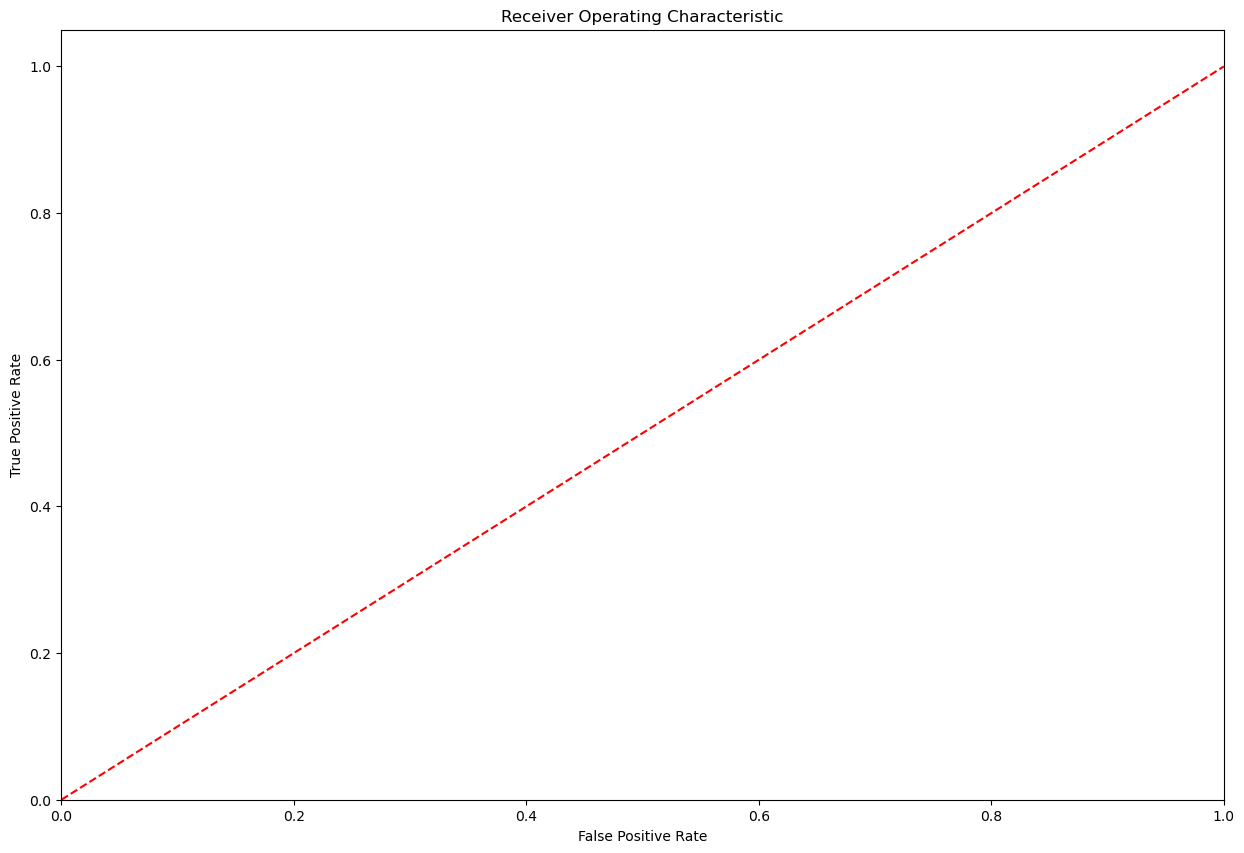

In [15]:
# ROC plot for max AUC

max_non_linear_index = rf_result.index(max(rf_result))
plt.figure(figsize=(15,10))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.plot(x_new, tpr_smooth, label='Random Forest (AUC = %0.4f)' % max(rf_result))
plt.legend(loc='lower right')
plt.plot()

[]

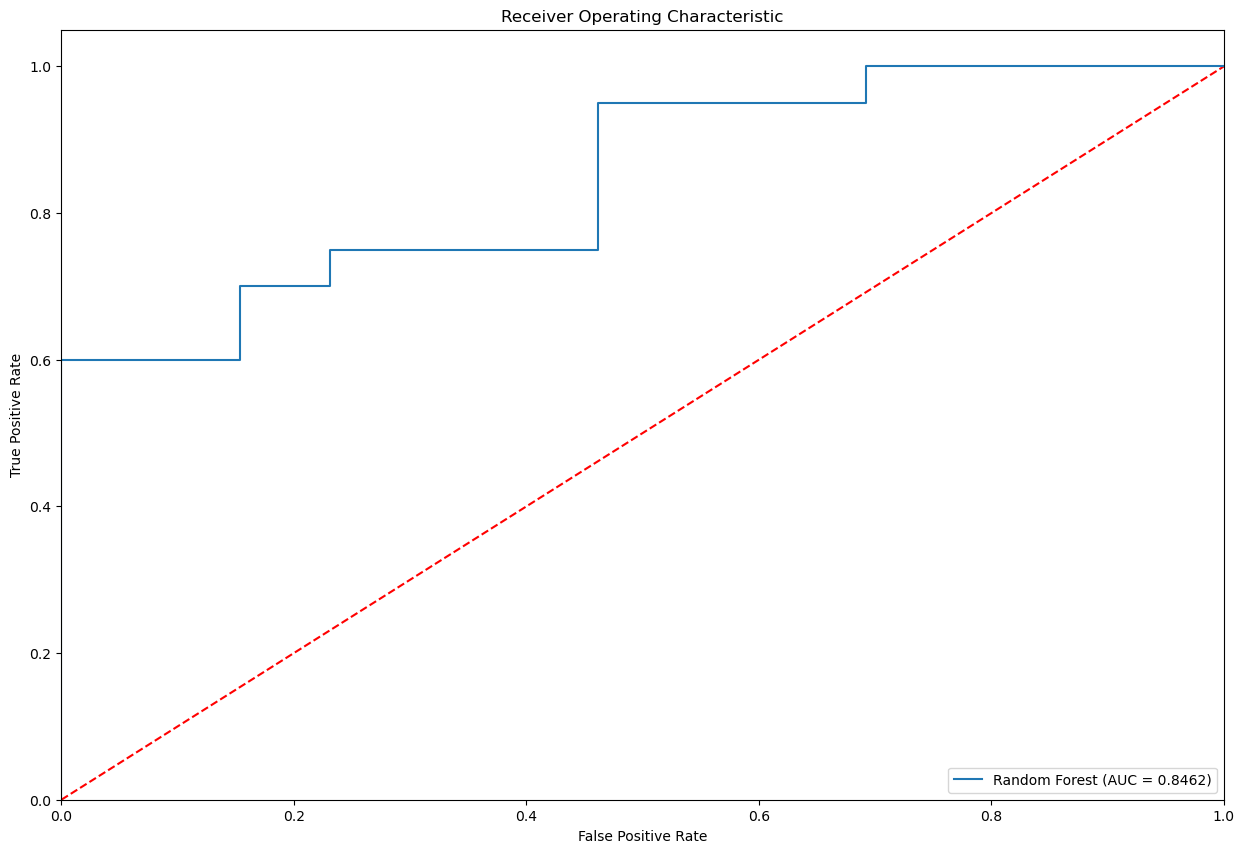

In [16]:
# ROC plot for max AUC

max_non_linear_index = rf_result.index(max(rf_result))
plt.figure(figsize=(15,10))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.plot(rf_fpr_1[max_non_linear_index], rf_tpr_1[max_non_linear_index], label='Random Forest (AUC = %0.4f)' % max(rf_result))
plt.legend(loc='lower right')
plt.plot()

Neural Network (using keras)

In [16]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam


2024-06-29 01:46:03.039703: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
def experiment(num):
    loss_results = []
    accuracy_results = []
    nn_auc_results = []
    threshold_results = []
    nn_fpr_results =[]
    nn_tpr_results = []
    for i in range(num):
        nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation=tf.nn.relu, input_shape=(8,)),  # input shape required
        tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
        ])

        opt=Adam(learning_rate=0.001)

        nn_model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        nn = nn_model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=0)
        loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
        loss_results.append(loss)
        accuracy_results.append(accuracy)
        predictions = nn_model.predict(X_test)
        neuralNetworkAUC = metrics.roc_auc_score(y_test, nn_model.predict(X_test))
        nn_auc_results.append(neuralNetworkAUC)
        fpr_NN, tpr_NN, threshold = metrics.roc_curve(y_test, nn_model.predict(X_test))
        nn_fpr_results.append(fpr_NN)
        nn_tpr_results.append(tpr_NN)
        threshold_results.append(threshold)
    return loss_results, accuracy_results, nn_auc_results, threshold_results, nn_fpr_results, nn_tpr_results
#neural_network_AUC = metrics.roc_auc_score(y_test, nn.predict(X_test, batch_size=None, verbose=0)[:,1])
#fpr_nn, tpr_nn, threshold = metrics.roc_curve(y_test, nn.predict(X_test, batch_size=None, verbose=0)[:,1])


In [18]:
#call the function
loss_results, accuracy_results, nn_auc_results, threshold_results, nn_fpr_results, nn_tpr_results = experiment(100)


2/2 [==============================] - 0s 974us/step


In [25]:
print(nn.history.keys())
# summarize history for accuracy
plt.plot(nn.history['accuracy'])
#plt.plot(nn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nn.history['loss'])
#plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'nn' is not defined

[]

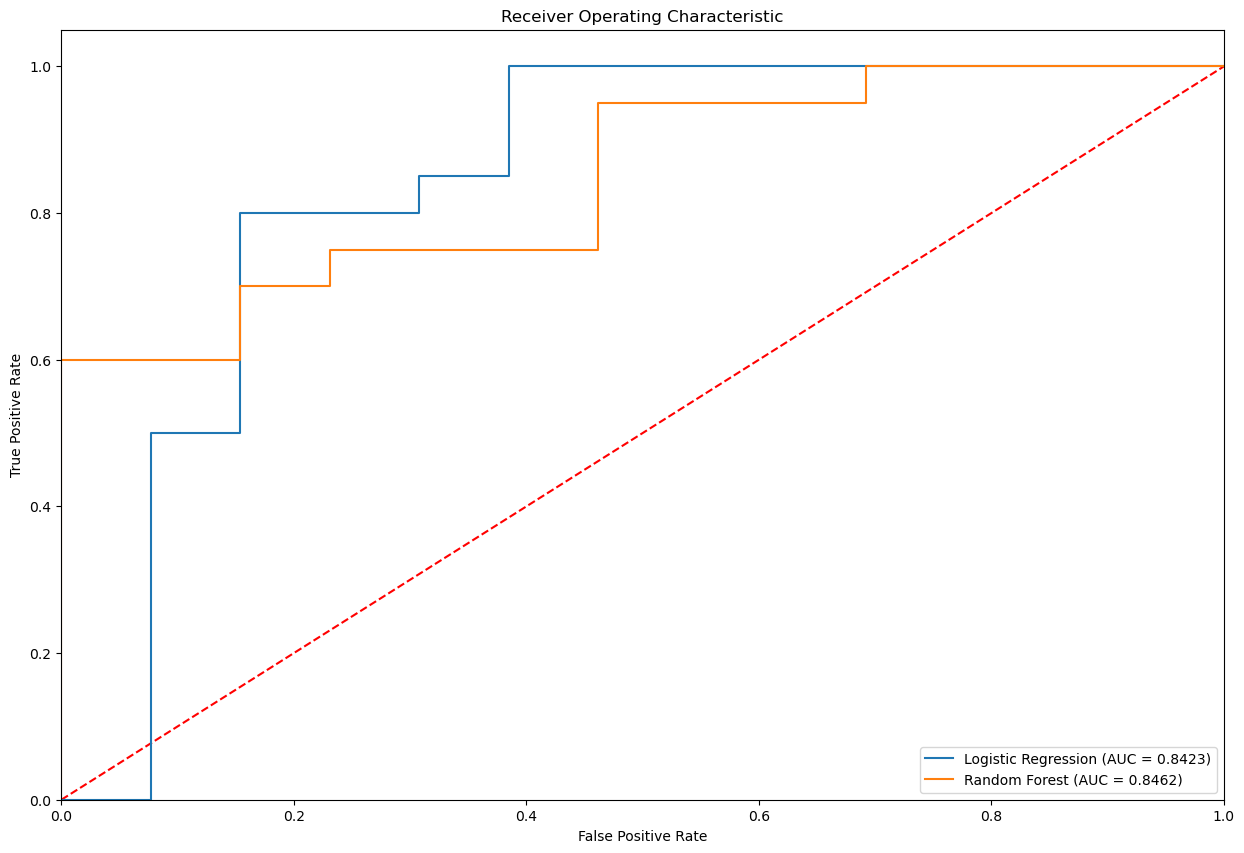

In [26]:
# ROC plot for max AUC Logistic and Random Forest
max_linear_index = logistic_regression_results.index(max(logistic_regression_results))
max_non_linear_index = rf_result.index(max(rf_result))
plt.figure(figsize=(15,10))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.plot(l_fpr[max_linear_index], l_tpr[max_linear_index], label='Logistic Regression (AUC = %0.4f)' % max(logistic_regression_results))
plt.plot(rf_fpr_1[max_non_linear_index], rf_tpr_1[max_non_linear_index], label='Random Forest (AUC = %0.4f)' % max(rf_result))
plt.legend(loc='lower right')
plt.plot()

[]

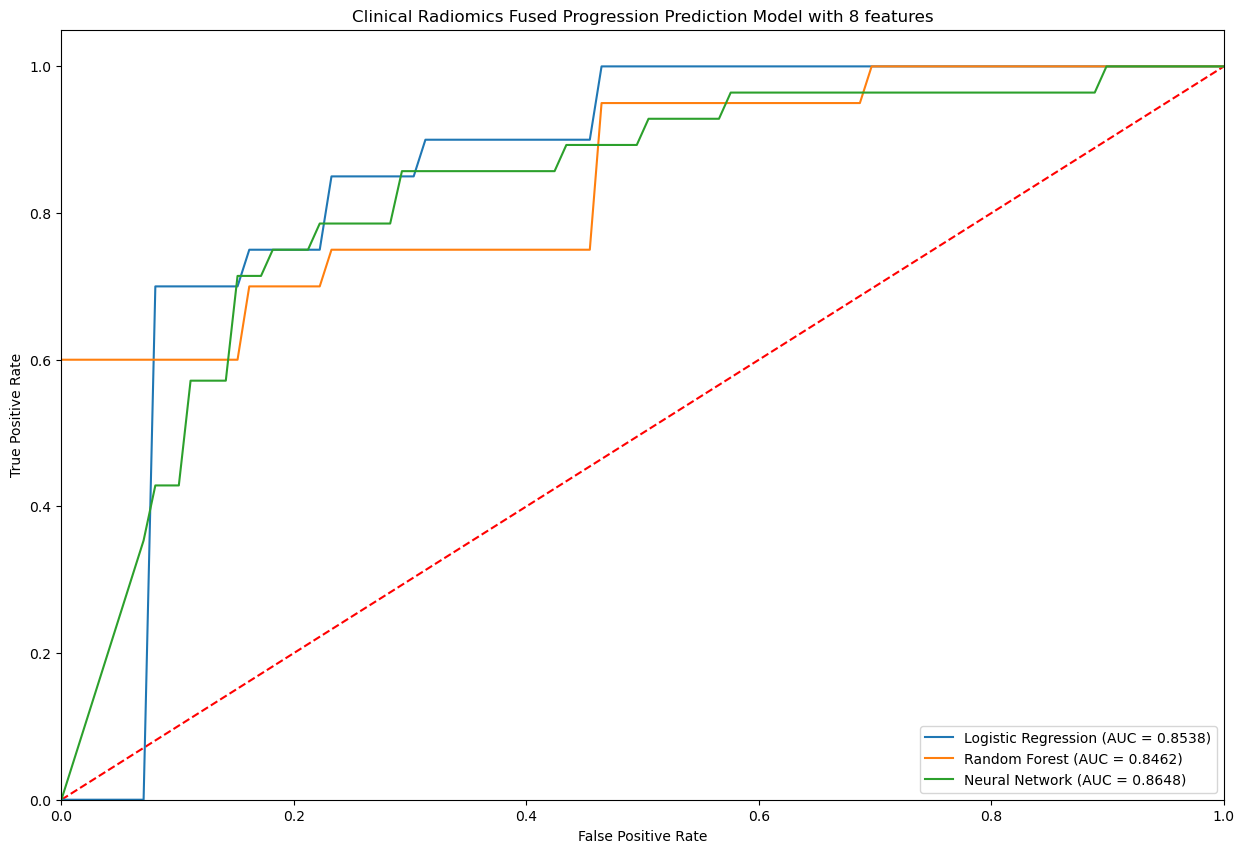

In [21]:
#Roc Auc Logistic and Random Forest Smooth
# ROC plot for max AUC Logistic and Random Forest
max_linear_index = logistic_regression_results.index(max(logistic_regression_results))
max_non_linear_index = rf_result.index(max(rf_result))
max_nn_index = nn_auc_results.index(max(nn_auc_results))
plt.figure(figsize=(15,10))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Clinical Radiomics Fused Progression Prediction Model with 8 features')
plt.plot(x_new, l_tpr_smooth, label='Logistic Regression (AUC = %0.4f)' % max(logistic_regression_results))
plt.plot(x_new, tpr_smooth, label='Random Forest (AUC = %0.4f)' % max(rf_result))
plt.plot(x_new, nn_tpr_smooth, label='Neural Network (AUC = %0.4f)' % max(nn_auc_results))
plt.legend(loc='lower right')
plt.plot()

In [20]:
print('average AUC for random forest is:', sum(rf_result)/len(rf_result))
print('Max AUC for random forest is:', max(rf_result))
print('average AUC for logistic regression is:', sum(logistic_regression_results)/len(logistic_regression_results))
print('Max AUC for logistic regression is:', max(logistic_regression_results))
print('average AUC for Neural Networks is:', sum(nn_auc_results)/len(nn_auc_results))
print('Max AUC for Neural Networks is:', max(nn_auc_results))

average AUC for random forest is: 0.8461538461538376
Max AUC for random forest is: 0.846153846153846
average AUC for logistic regression is: 0.8423076923077063
Max AUC for logistic regression is: 0.8423076923076923
average AUC for Neural Networks is: 0.7972257653061221
Max AUC for Neural Networks is: 0.8520408163265306
